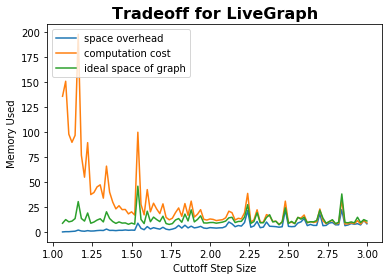

<Figure size 432x288 with 0 Axes>

In [4]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(sim, n,verbose = True):
    sum1,sq_sum1,sum2,sq_sum2,sum3,sq_sum3 = reduce(lambda x,y : (x[0]+y[0], x[1]+y[0]**2,\
                                                     x[2]+y[1], x[3]+y[1]**2,\
                                                     x[4]+y[2], x[5]+y[2]**2),\
                                        sim.sample_repeated(n),(0,0,0,0,0,0))
    if verbose:
        print("confidence for space complexity")
        MC.Calculate_ConfIntv(sum1,sq_sum1,n,.99)
        print("confidence for time complexity")
        MC.Calculate_ConfIntv(sum2,sq_sum2,n,.99)
    return (sum1/n, sq_sum1/n, sum2/n, sq_sum2/n,sum3/n,sq_sum3/n)

alpha = -2
xmin = 1
n = 10000
inv_f = lambda x : MC.inverse_continuous_power_law(x,xmin,alpha)
rv = MC.RandomVariable(inv_f,"power law, alpha = -2, for x > 1",discrete = False,verbose = False)
X  = []
Y1 = []
Y2 = []
Y3 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))
    cost_f = lambda x : cost_powers_k(x,i)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _, y3, _ = sum_pair_costs(Sim, n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
plt.plot(X,Y1,label = "space overhead")
plt.plot(X,Y2,label = "computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
#plt.ylim(0,300)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for LiveGraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Memory Used")
plt.show()
plt.savefig('results/continuous_fig.png')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

n = 200000
X = []
Y1 = []
Y2 = []
for j in range(20):
    i = 2.1-j/100
    inv_f = lambda x : MC.inverse_continuous_power_law(x,1,-3)
    cost_f = lambda x : cost_powers_k(x,i)
    print ("i = {}".format(i))
    rv = MC.RandomVariable(inv_f,"power law, alpha = -2, for x > 1",discrete = False,verbose = False)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _ = sum_pair_costs(Sim,n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
plt.plot(X,Y1,label = 'memory cost')
plt.plot(X,Y2,label = "computation cost")
# Add legend
plt.legend(loc='lower left')
# Add title and x, y labels
plt.title("Tradeoff for LiveGraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Step Size")
plt.ylabel("Memory Used")
plt.show()


i = 2.1


TypeError: can't convert complex to float

In [2]:
list(rv.sample_repeated(30))


[1.083252381762769,
 1.7349162208624411,
 1.3942274252629856,
 2.069801004404356,
 6.029046862265378,
 3.0976483044882217,
 4.579210663149215,
 2.942813474772894,
 2.4364700500027348,
 1.284002163344647,
 7.855345361134659,
 1.7830378232579707,
 41.00886171263382,
 1.6537735422204558,
 13.876210940406034,
 1.7728931320419783,
 45.180824174917305,
 1.8048575397568634,
 1.2075960366045733,
 17.09126893552623,
 1.9811301806659756,
 1.0333977872721942,
 2.0112199519491214,
 1.8986328885561838,
 1.9894934254682752,
 3.732801691911297,
 1.5250003730451478,
 9.297905864925529,
 2.7695641044742727,
 2.566254102238532]

In [3]:

import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(sim, n,verbose = True):
    sum1,sq_sum1,sum2,sq_sum2,sum3,sq_sum3 = reduce(lambda x,y : (x[0]+y[0], x[1]+y[0]**2,\
                                                     x[2]+y[1], x[3]+y[1]**2,\
                                                     x[4]+y[2], x[5]+y[2]**2),\
                                        sim.sample_repeated(n),(0,0,0,0,0,0))
    if verbose:
        print("confidence for space complexity")
        MC.Calculate_ConfIntv(sum1,sq_sum1,n,.99)
        print("confidence for time complexity")
        MC.Calculate_ConfIntv(sum2,sq_sum2,n,.99)
    return (sum1/n, sq_sum1/n, sum2/n, sq_sum2/n,sum3/n,sq_sum3/n)

val_array = []
count_array = []
with open('data/counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        val_array.append(int(v1))
        count_array.append(int(v2))
val_array   = np.array(val_array)
count_array = np.array(count_array)
factor  = sum(count_array)
count_array = count_array/factor

sampling_func  = lambda : np.random.choice(val_array,p = count_array)
rv = MC.RandomVariable(transform_func=  sampling_func,
                 description = 'Random Sample of the degree of a Node in LiveJournal',\
                 discrete = True, verbose = True)
n = 10
X  = []
Y1 = []
Y2 = []
Y3 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))
    cost_f = lambda x : cost_powers_k(x,i)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _, y3, _ = sum_pair_costs(Sim, n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
plt.plot(X,Y1,label = "space overhead")
plt.plot(X,Y2,label = "computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
#plt.ylim(0,300)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for LiveGraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Memory Used")
plt.show()
plt.savefig('Myimage.png')

testing random variable with distribution Random Sample of the degree of a Node in LiveJournal,
 59706557



KeyboardInterrupt: 

In [6]:
print("{}".format(int(np.random.choice(val_array,p = count_array))))

46817320


In [19]:
# Check the analytic solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

# Define the expression whose roots we want to find

alpha = -3
beta = .2

recurance_relationship = lambda p1,p2 : lambda p3: beta*p3**(alpha+1)/(alpha+1)-p3*p2**(alpha)  -\
                            (1-beta)*p2**(alpha+1)-p1**(alpha+1)/(alpha+1) + beta*(p1*p2**(alpha))
initial_condition = lambda p1: lambda p2: beta*p2**(alpha+1)/(alpha+1) - p2*p1**(alpha) - (1-beta)*p1**(alpha+1)-1.0/(alpha+1)


p1 = 1
func = initial_condition(p1)
initial_guess = 1.0/beta
p2 = fsolve(func, initial_guess)[0]
cutoffList = [p1,p2]

for i in range(10):
    func = recurance_relationship(p1,p2)
    initial_guess = p2/beta
    p3 = fsolve(func,initial_guess)[0]
    cutoffList.append(p3)
    p1 = p2
    p2 = p3


print (cutoffList)

[1, -0.5886211907610405, 0.6216920639901612, -0.4107450841611377, 0.40544312290349055, -0.2888583635120118, 0.2715504250230183, -0.20341401209305082, 0.18465506359352585, -0.1430791689687923, 0.12669173223907212, -0.10045438149476393]
